### **EDA + LINEAR REGRESSION - Medical insurance**

## EDA

In [20]:
import pandas as pd

data = pd.read_csv("medical_insurance_cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
# DELETING THE IRRELEVANT INFORMATION

df.drop(['region'], axis = 1, inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


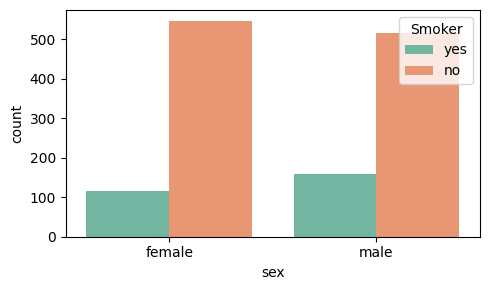

In [23]:
#CATEGORICAL ANALYSIS

import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure with a single axis
fig, axis = plt.subplots(1, 1, figsize=(5, 3))

# Define the color palette
palette = "Set2"  

# Combine 'sex' and 'smoker' into a single countplot
sns.countplot(data=df, x="sex", hue="smoker", palette=palette, ax=axis)

# Set legend
axis.legend(title="Smoker", loc="upper right")

plt.tight_layout()
plt.show()

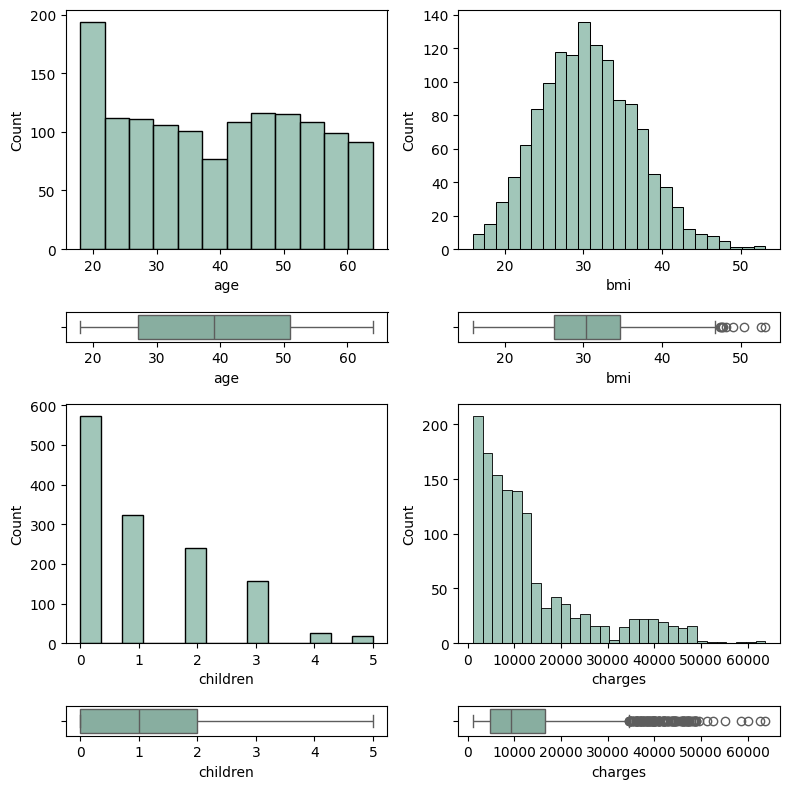

In [24]:
#NUMERICAL ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
fig, axis = plt.subplots(4, 2, figsize=(8, 8), gridspec_kw={"height_ratios": [8, 1, 8, 1]})

color = '#82B4A2'

sns.histplot(data=df, x="age", color=color, ax=axis[0, 0])
sns.boxplot(data=df, x="age", color=color, ax=axis[1, 0])

sns.histplot(data=df, x="bmi", color=color, ax=axis[0, 1])
sns.boxplot(data=df, x="bmi", color=color, ax=axis[1, 1])

sns.histplot(data=df, x="children", color=color, ax=axis[2, 0])
sns.boxplot(data=df, x="children", color=color, ax=axis[3, 0])

sns.histplot(data=df, x="charges", color=color, ax=axis[2, 1])
sns.boxplot(data=df, x="charges", color=color, ax=axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


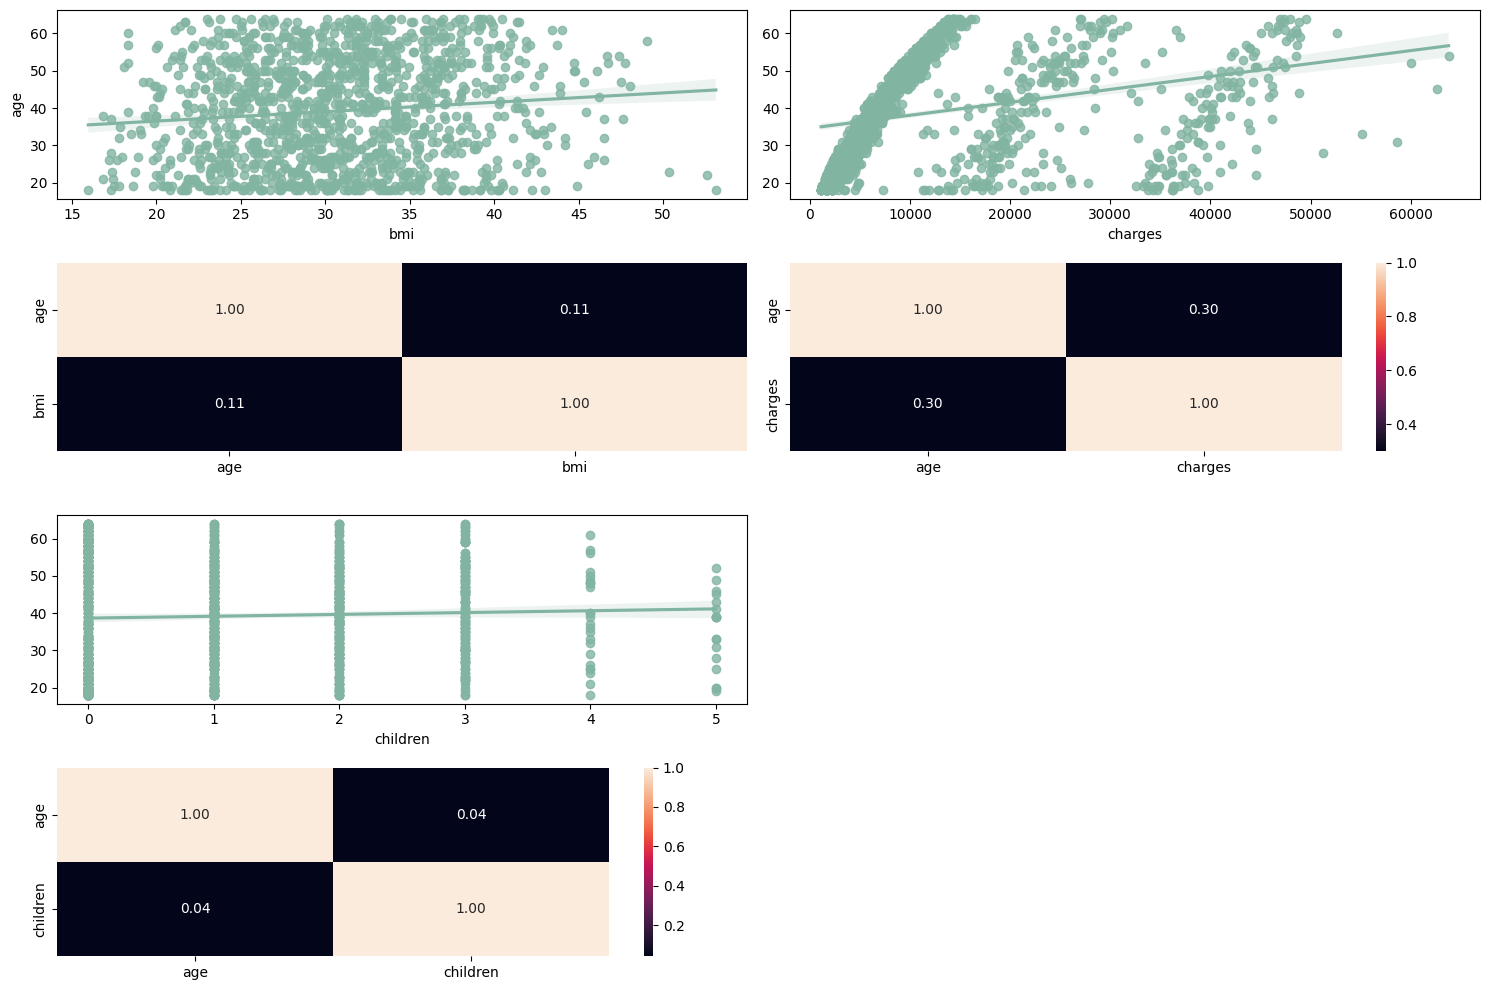

In [25]:
#NUMERICAL-NUMERICAL ANALYSIS

# Creating the figures
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Set axis labels
sns.regplot(ax = axis[0, 0], data = df, x = "bmi", y = "age", color= "#82B4A2")
sns.heatmap(df[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False, color="#82B4A2")

sns.regplot(ax = axis[0, 1], data = df, x = "charges", y = "age", color="#82B4A2").set(ylabel = None)
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], color="navy")

sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "age", color="#82B4A2").set(ylabel = None)
sns.heatmap(df[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], color="navy").set(ylabel = None)

fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

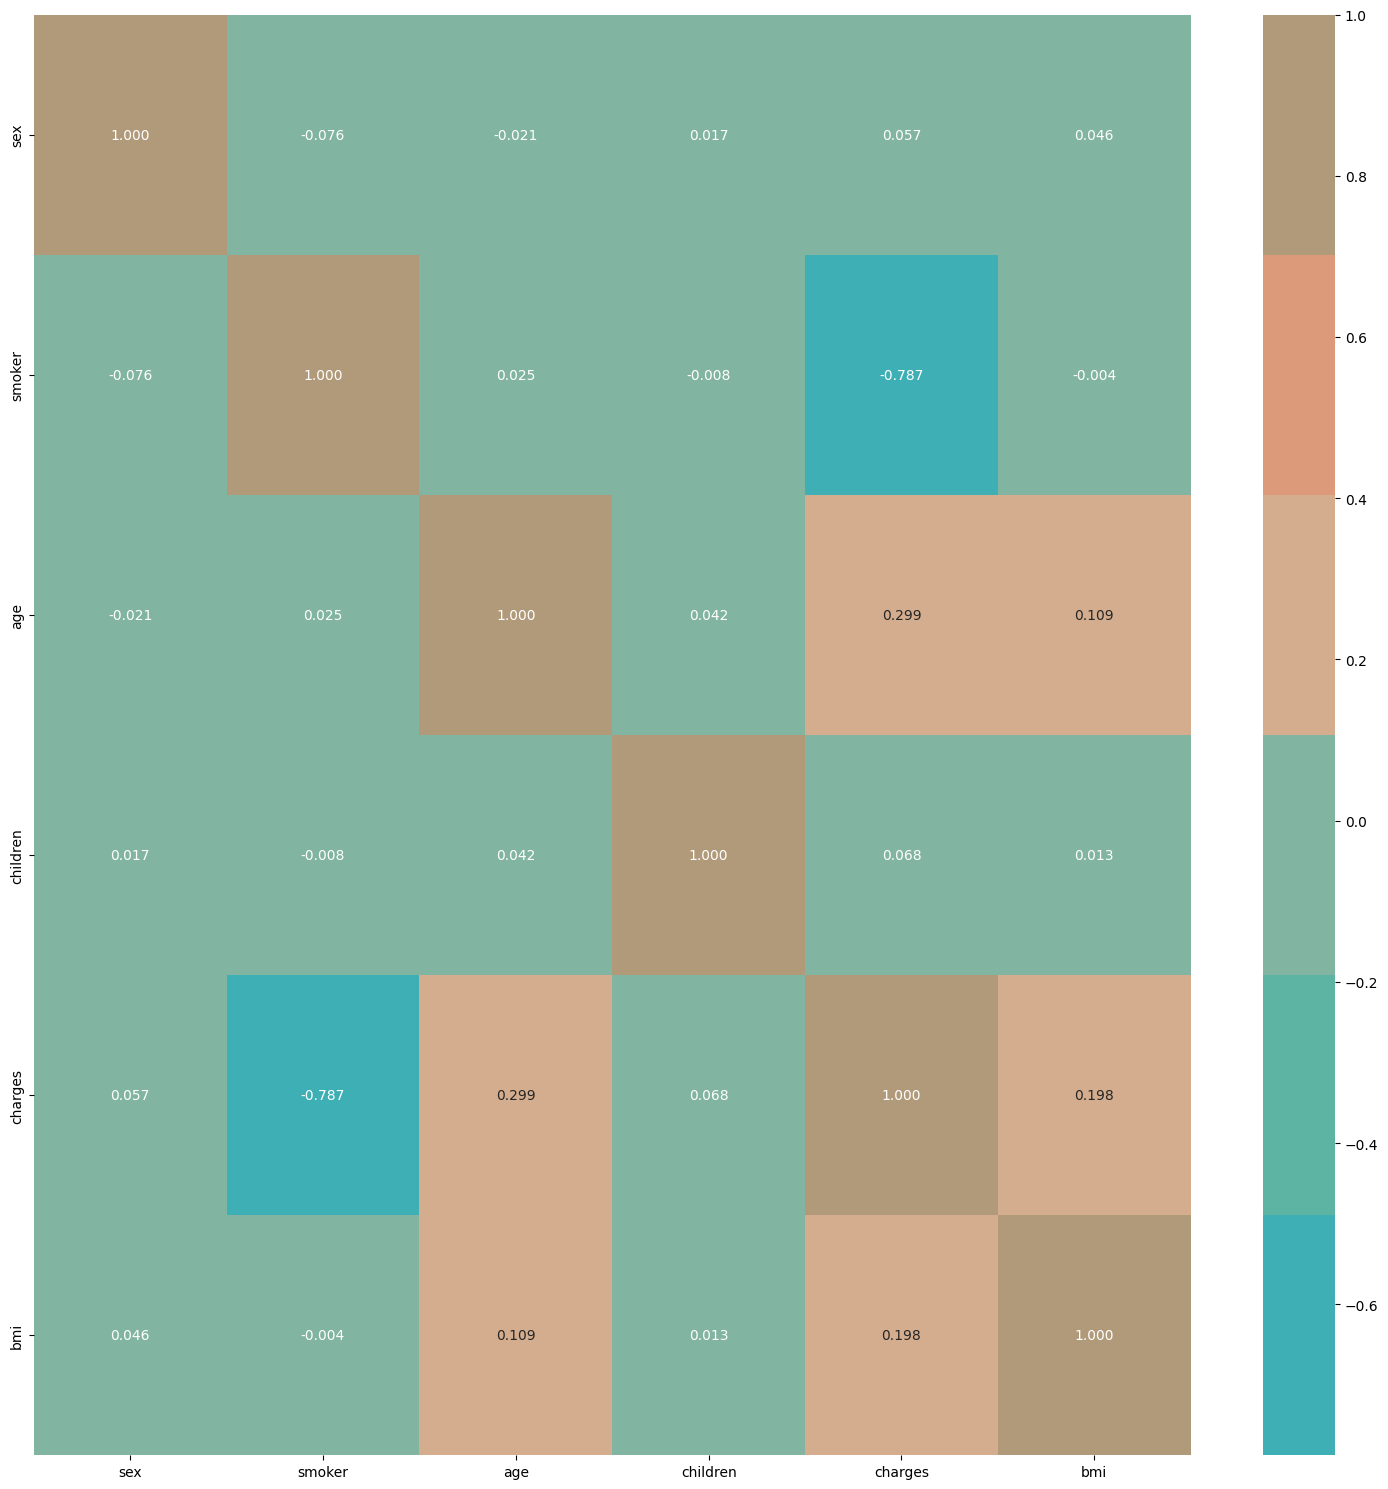

In [26]:
#NUMERICAL-CATEGORICAL

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

# Assuming df contains your DataFrame with appropriate data
# Factorize the categorical variables
df["sex"] = pd.factorize(df["sex"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]

# Create a custom colormap 
palette = ["#3EAFB4", "#5DB4A2", "#82B4A2", "#D4AD8E", "#DC9A7A", "#B19A7A"]
cmap_color = ListedColormap(palette)

fig, axes = plt.subplots(figsize=(15, 15))

# Create the heatmap using the navy colormap
sns.heatmap(df[["sex","smoker","age","children","charges","bmi"]].corr(), annot=True, fmt=".3f", cmap=cmap_color)

plt.tight_layout()

# Show the plot
plt.show()

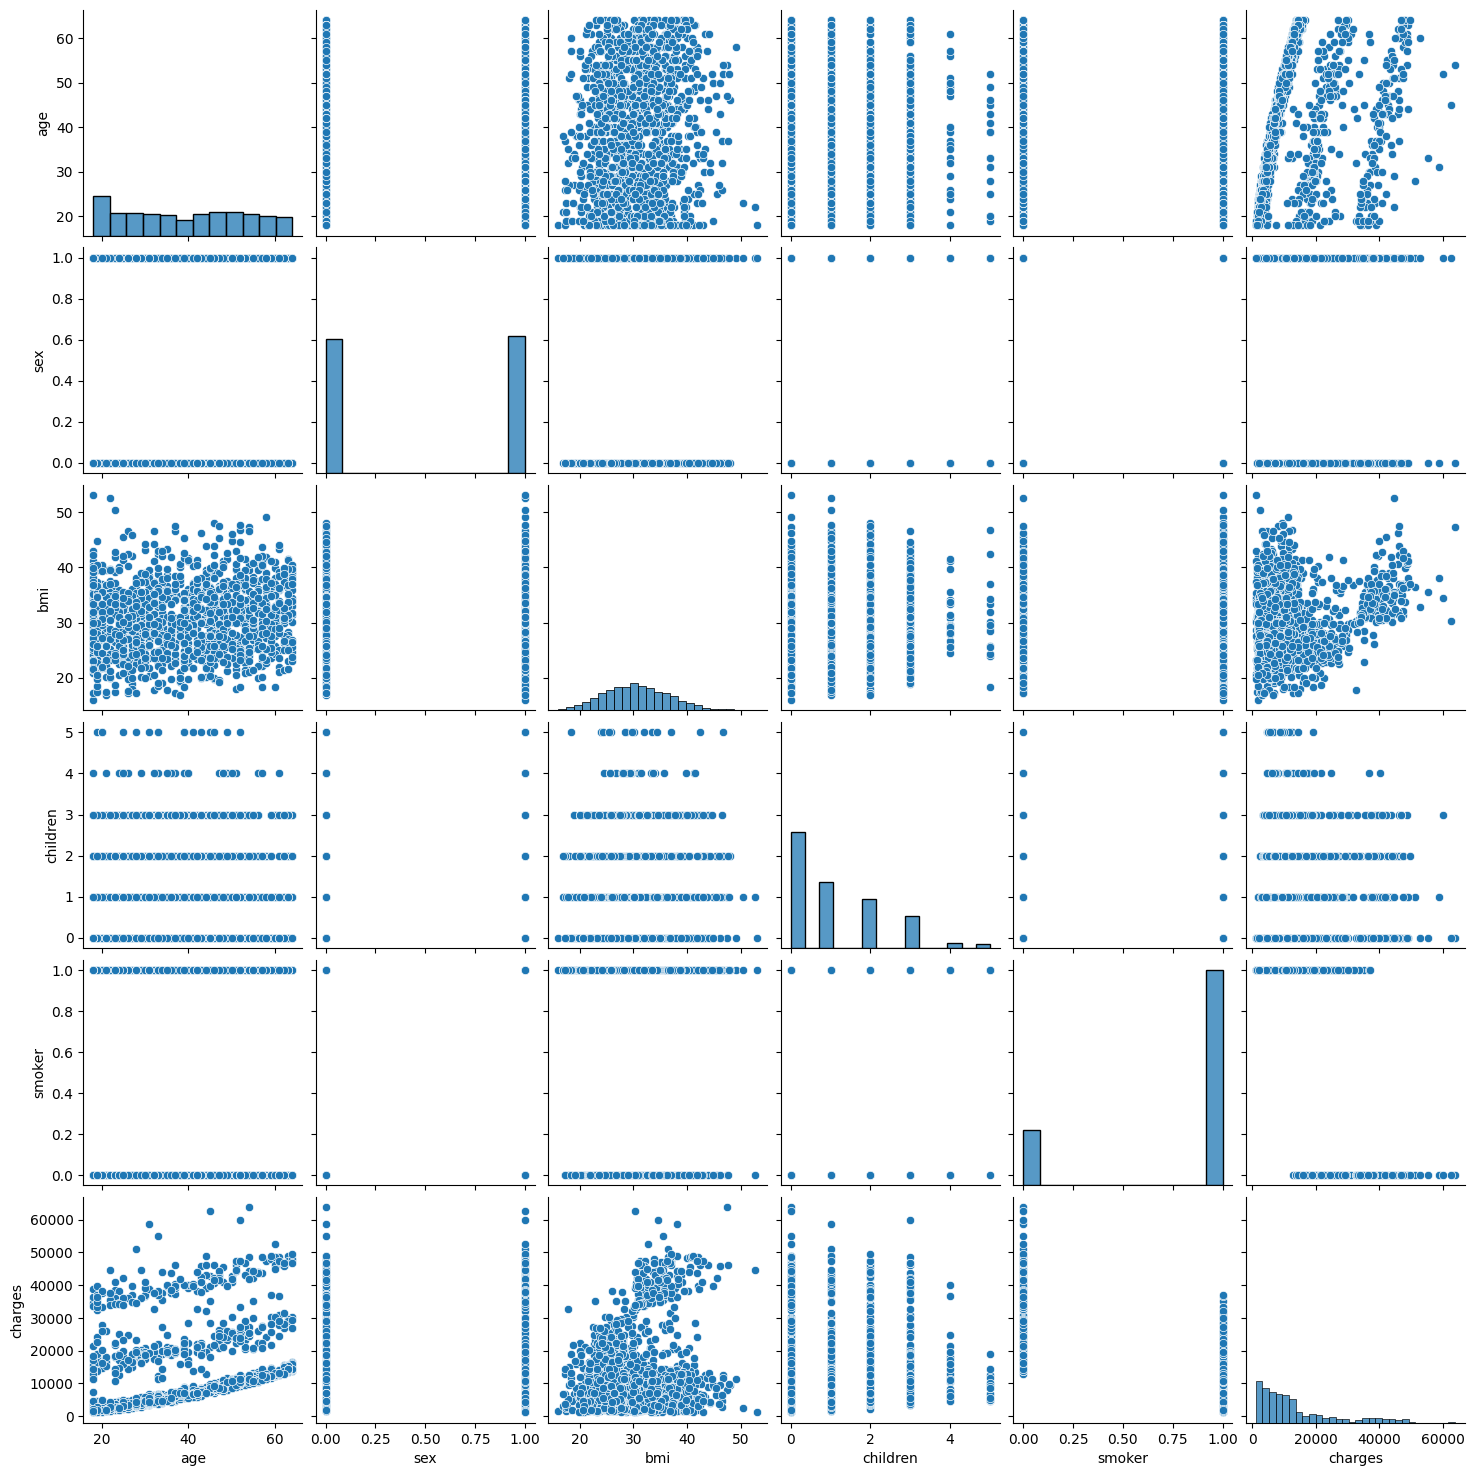

In [27]:
sns.pairplot(data=df)

In [28]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [29]:
df.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
dtype: int64

In [30]:
#FEACTURE SKALING

from sklearn.preprocessing import MinMaxScaler

# Factorize categorical variables
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]

# Define variables for scaling
num_variables = ["age","children","charges","bmi","sex_n","smoker_n"]

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale numerical features
scal_features = scaler.fit_transform(df[num_variables])

# Create a DataFrame with scaled features
df_scal = pd.DataFrame(scal_features, index=df.index, columns=num_variables)

# Display the scaled DataFrame
df_scal.head()
from sklearn.preprocessing import MinMaxScaler

df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
total_data_scal.head()


,age,bmi,children,sex_n,smoker_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.043816


In [31]:
#Feature selection

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("bmi", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

,age,children,smoker_n,charges
0,0.608696,0.4,1.0,0.128845
1,0.630435,0.0,1.0,0.118324
2,0.739130,0.0,1.0,0.414952
3,0.456522,1.0,1.0,0.119316
4,0.782609,0.6,1.0,0.181225


In [32]:
X_test_sel.tail()

,age,children,smoker_n,charges
263,0.978261,0.0,0.0,0.733196
264,0.869565,0.0,1.0,0.177195
265,0.434783,0.2,1.0,0.078936
266,0.782609,0.0,0.0,1.000000
267,0.717391,0.2,1.0,0.139681


In [33]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("clean_train.csv", index = False)
X_test_sel.to_csv("clean_test.csv", index = False)

## LINEAL REGRESSION

In [34]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

,age,children,smoker_n,charges
0,0.608696,0.4,1.0,0.128845
1,0.630435,0.0,1.0,0.118324
2,0.739130,0.0,1.0,0.414952
3,0.456522,1.0,1.0,0.119316
4,0.782609,0.6,1.0,0.181225


In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [36]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 2.220446049250313e-16
Coefficients (b1, b2): [ 4.80571914e-17  1.11022302e-16 -2.58006543e-17 -2.93255844e-16
  1.00000000e+00]


In [37]:
y_pred = model.predict(X_test)
y_pred

array([1.27268609e-01, 6.62473693e-02, 4.50275504e-01, 1.30569967e-01,
       5.20816775e-01, 5.45006209e-02, 1.58896716e-02, 2.08922013e-01,
       4.16729681e-02, 1.45934225e-01, 2.73547288e-01, 9.79248330e-02,
       4.51014272e-02, 7.18759614e-01, 7.59022863e-01, 6.87658004e-01,
       1.38534950e-01, 6.67979962e-01, 1.13509780e-01, 3.29655625e-01,
       6.31813799e-02, 1.00874269e-01, 2.14570156e-03, 2.60683917e-02,
       1.59041386e-01, 1.56461062e-01, 1.83926274e-01, 2.82255173e-01,
       1.37177421e-01, 1.53757738e-04, 2.34753188e-01, 1.71125256e-01,
       1.43447588e-02, 7.29714622e-02, 2.84478090e-02, 1.00984454e-01,
       2.35584862e-02, 9.92181574e-02, 3.63388894e-01, 5.99970784e-01,
       5.69194796e-02, 2.42845924e-02, 1.68435748e-01, 1.75632441e-01,
       6.01470481e-02, 1.78965888e-01, 3.92340228e-02, 5.21923953e-02,
       6.54486636e-01, 5.33345302e-02, 2.03760969e-01, 9.53832708e-03,
       4.36639943e-01, 9.37055704e-03, 1.51198251e-01, 3.86464768e-01,
      

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 8.640769189413206e-33
R2 Score: 1.0
